### Exemplo: No nosso caso, vamos ver a performance de uma carteira de ativos. Vamos chamar de carteira do Lira.

- Temos o arquivo 'Carteira.xlsx' com os ativos e suas respectivas quantidades
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

carteira = pd.read_excel('Carteira.xlsx')
carteira = carteira.drop(carteira[carteira['Ativos'] == 'GNDI3'].index)
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
9,NTCO3,Ação,100
10,BCRI11,FII,100


### Criando nosso dataframe de Cotações dos ativos da carteira

In [33]:
cotacoes_carteira = pd.DataFrame()

start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020, 11, 10)

for ativo in carteira['Ativos']:
    if ativo == 'GNDI3':
        pass
    else:
        cotacoes_carteira[ativo] = yf.download(f'{ativo}.SA', start, end)['Adj Close']
    
display(cotacoes_carteira)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,24.439573,33.860641,10.9650,17.084026,17.714903,38.093487,108.023552,135.066360,181.281815,NaN
2020-01-03,113.800003,140.899994,11.922436,24.451942,33.504482,11.0675,17.537737,17.766314,40.747009,109.316154,133.253372,181.281815,NaN
2020-01-06,112.589996,139.100006,11.932190,24.015188,33.005898,11.3500,17.602497,17.740608,39.882378,108.460106,134.667511,179.810471,NaN
2020-01-07,112.239998,139.399994,11.898048,23.597986,32.240166,11.2650,17.567360,17.811388,40.528366,108.605644,130.379822,180.509811,NaN
2020-01-08,111.949997,138.199997,12.263844,23.232931,31.714851,11.2125,17.655195,17.653538,40.737072,106.636749,126.427544,170.292236,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,92.260002,109.980003,24.945910,15.097274,21.891117,13.8050,15.907247,16.902935,46.143505,92.015610,113.491989,143.790253,114.314522
2020-11-04,94.160004,112.000000,26.143793,14.987824,22.765310,14.4000,16.284948,17.820776,47.375851,92.024170,115.096466,143.844772,114.448975
2020-11-05,96.949997,115.900002,27.401571,15.219746,23.302563,14.6775,17.233583,18.608171,49.969746,92.024170,116.374619,143.663086,114.717941


### Será que todos os dados vieram corretos?

In [34]:
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-09
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   NTCO3   214 non-null    float64
 9   BCRI11  214 non-null    float64
 10  VILG11  214 non-null    float64
 11  KNRI11  214 non-null    float64
 12  XPLG11  109 non-null    float64
dtypes: float64(13)
memory usage: 23.4 KB


### Ajustando os dados

In [35]:
# df_media = cotacoes_carteira.mean()
# cotacoes_carteira = cotacoes_carteira.fillna(df_media)
cotacoes_carteira = cotacoes_carteira.bfill()
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-09
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   NTCO3   214 non-null    float64
 9   BCRI11  214 non-null    float64
 10  VILG11  214 non-null    float64
 11  KNRI11  214 non-null    float64
 12  XPLG11  214 non-null    float64
dtypes: float64(13)
memory usage: 23.4 KB


### Vamos ver como que as ações foram individualmente

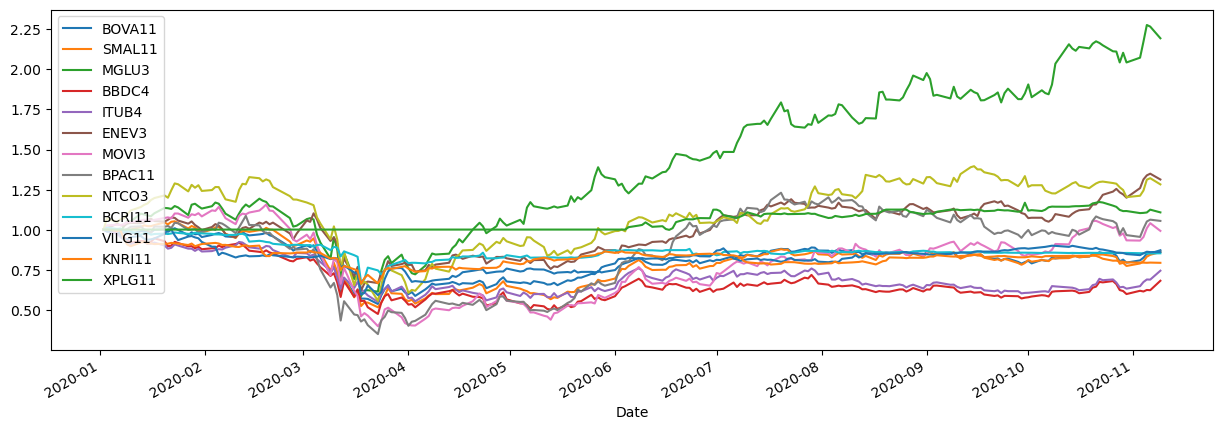

In [36]:
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]
carteira_norm.plot(figsize=(15, 5))
plt.legend(loc='upper left')
plt.show()

### Vamos puxar o IBOV para comparar

In [37]:
cotacao_ibov = yf.download('^BVSP', start, end)
display(cotacao_ibov)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...
2020-11-03,93968.0,96250.0,93968.0,95587.0,95587.0,10191800
2020-11-04,95992.0,98296.0,95987.0,97811.0,97811.0,10704600
2020-11-05,97873.0,100922.0,97872.0,100774.0,100774.0,10455300


### Criando um dataframe da Carteira com as quantidades de ações

In [38]:
valor_investido = pd.DataFrame()

for ativo in carteira['Ativos']:
    valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]
    
display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.734612,2443.957329,3386.064148,3289.500046,1708.402634,1771.490288,3809.348679,10802.355194,13506.636047,18128.181458,10364.599609
2020-01-03,11380.000305,14089.999390,11922.435760,2445.194244,3350.448227,3320.250034,1753.773689,1776.631355,4074.700928,10931.615448,13325.337219,18128.181458,10364.599609
2020-01-06,11258.999634,13910.000610,11932.189941,2401.518822,3300.589752,3405.000114,1760.249710,1774.060822,3988.237762,10846.010590,13466.751099,17981.047058,10364.599609
2020-01-07,11223.999786,13939.999390,11898.048401,2359.798622,3224.016571,3379.500103,1756.735992,1781.138802,4052.836609,10860.564423,13037.982178,18050.981140,10364.599609
2020-01-08,11194.999695,13819.999695,12263.843536,2323.293114,3171.485138,3363.749886,1765.519524,1765.353775,4073.707199,10663.674927,12642.754364,17029.223633,10364.599609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,9226.000214,10998.000336,24945.909500,1509.727383,2189.111710,4141.500092,1590.724659,1690.293503,4614.350510,9201.560974,11349.198914,14379.025269,11431.452179
2020-11-04,9416.000366,11200.000000,26143.793106,1498.782444,2276.531029,4319.999886,1628.494835,1782.077599,4737.585068,9202.416992,11509.646606,14384.477234,11444.897461
2020-11-05,9694.999695,11590.000153,27401.571274,1521.974564,2330.256271,4403.249931,1723.358345,1860.817146,4996.974564,9202.416992,11637.461853,14366.308594,11471.794128


### Comparação Carteira x IBOV

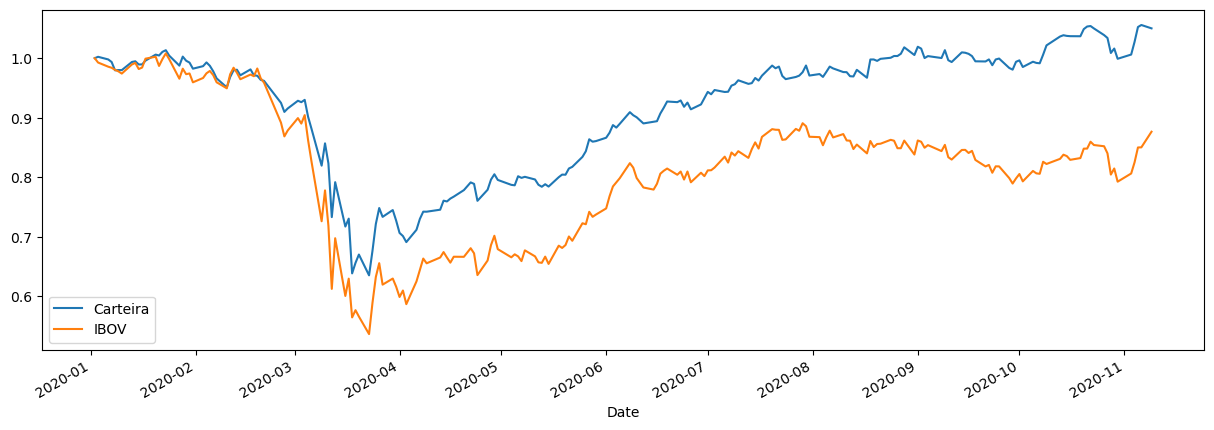

In [44]:
valor_investido['Total'] = valor_investido.sum(axis=1)

valor_investido_norm = valor_investido / valor_investido.iloc[0]
cotacao_ibov_norm = cotacao_ibov / cotacao_ibov.iloc[0]

valor_investido_norm['Total'].plot(figsize=(15, 5), label='Carteira')
cotacao_ibov_norm['Adj Close'].plot(label='IBOV')
plt.legend()
plt.show()

In [ ]:
retorno_carteira = valor_investido['Total'][-1] / valor_investido['Total'][0]

### Correlação da Carteira com o IBOV